In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
np.random.seed(7)

## Генерация данных

In [ ]:
train_data = np.random.normal(-1, size=(100, 2))
train_labels = np.zeros(100)

train_data = np.r_[train_data, np.random.normal(1, size=(100,2))]
train_labels = np.r_[train_labels, np.ones(100)]

##Картинка

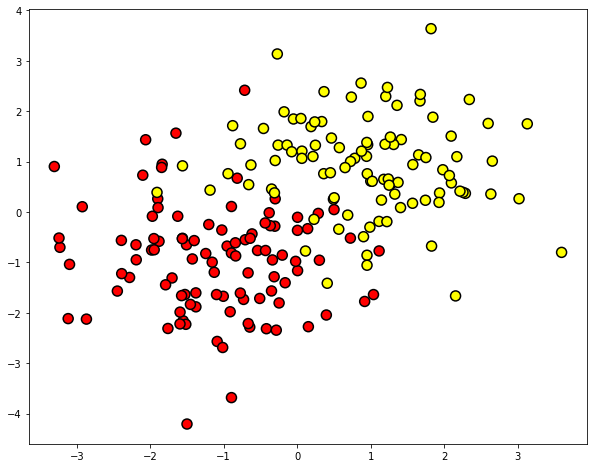

In [ ]:
plt.rcParams['figure.figsize'] = (10,8)
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100,
            cmap='autumn', edgecolors='black', linewidth=1.5)
# plt.plot(range(-4,5), range(4,-5,-1))

## Обучение

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
def get_grid(data):
  x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
  y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1

  return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))


In [ ]:
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=7)

In [ ]:
clf_tree.fit(train_data, train_labels)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=7)

In [ ]:
xx, yy = get_grid(train_data)

In [ ]:
predicted = clf_tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
predicted


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.]])

## Визуализация

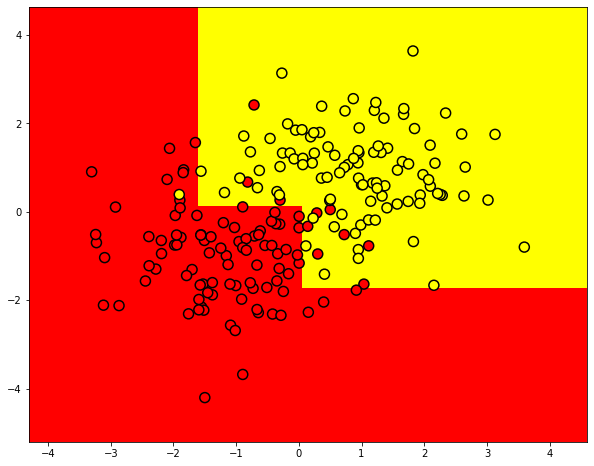

In [ ]:
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100,
            cmap='autumn', edgecolors='black', linewidth=1.5)